# Data Science and Business Analytics Internship

# @ The Spark Foundation 

# Name: Sannidhya Das
# Batch: GRIPNOVEMBER23
# Task 4: Prediction Using Supervised Machine Learning

# Overview:
In this given task we have given a data of students scores and we have to predict the percentage of an student based on the no. of study hours.
In machine learning we have three types a.Supervised machine learning , b.Unsupervised machine learning , c.Reinforcement machine learning . And Under supervised machine learning, regression algorithms are used to predict a continuous output variable based on one or more input variables. Here by observing the data it's clear that Simple Linear Regration would be used.  



Importing all libraries required

In [216]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [217]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


The shape of dataset 

In [218]:
data.shape

(25, 2)

check the info of data

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


check the description of student_score data

In [220]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

Plotting the distribution of scores

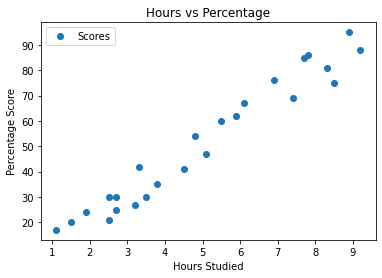

In [221]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Linear Regression Model

Now we prepare the data and split it in test data.

In [222]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=7)

# Training the model

In [223]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

# Training the Algorithm

Now the spliting of our data into training and testing sets is done, now it's time to train our algorithm.

In [224]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Plotting the regression line

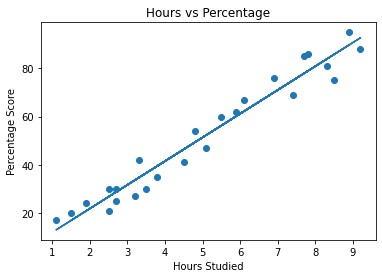

In [225]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# Checking the accuracy scores for training and test set

In [226]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.8735107022601714
Training Score
0.956360005211269


In [227]:
y_test

array([47, 20, 62, 42, 27], dtype=int64)

In [228]:
y_predict

array([49.38042633, 28.70837837, 26.73961189, 46.42727662, 26.73961189,
       70.0524743 , 92.69328874, 28.70837837, 20.83331248, 78.91192343,
       77.92754019, 62.17740841, 83.83383961, 12.95824658, 56.27110899,
       74.97439048, 85.80260608, 39.53659397, 36.58344426, 89.74013903])

In [229]:
y_predict[:5]

array([49.38042633, 28.70837837, 26.73961189, 46.42727662, 26.73961189])

In [230]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict[:5]})
data

,Actual,Predicted
0,47,49.380426
1,20,28.708378
2,62,26.739612
3,42,46.427277
4,27,26.739612


# Question: 
What will be the predicted score if a student studies for 9.25 hrs/day ?

In [231]:
print('Score of student who studied for 9.25 hours a day', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [93.18548035]


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [232]:
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 268.8931665881131
Mean absolute Error: 10.207371506801524


# Thank You